# EDA

#### 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


- **Unnamed: 0**
  - 불필요한 컬럼이므로 삭제 
- **sales**
  - 단위가 서로 다르기에 통일해야함 
- **Year**
  - 88,04 등 4자리수로 이루어지지 않은 년도가 많음
  - float형으로 구성 -> int형으로 변환
- **Publisher**
  -  결측치가 있는데 삭제해야할지 고려해봐야함

#### Unnamed :0 제거

In [4]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

#### Genre NaN값 제거

In [5]:
df.dropna(subset = ['Genre'],inplace=True)

In [6]:
df.reset_index(drop=True)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16543,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16544,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16545,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16546,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


#### Sale 단위 통일

In [7]:
def transform(data):
  if 'K' in data:
    transformData = data.replace('K', '')
    transformData =  float(transformData)
    return transformData / 1000
  elif 'M' in data:
    transformData = data.replace('M','')
    transformData = float(transformData)
    return transformData 
  else: 
    return float(data)

In [8]:
df['NA_Sales'] = df.NA_Sales.apply(transform)
df['EU_Sales'] = df.EU_Sales.apply(transform)
df['JP_Sales'] = df.JP_Sales.apply(transform)
df['Other_Sales'] = df.Other_Sales.apply(transform)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16548 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16548 non-null  object 
 1   Platform     16548 non-null  object 
 2   Year         16277 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16490 non-null  object 
 5   NA_Sales     16548 non-null  float64
 6   EU_Sales     16548 non-null  float64
 7   JP_Sales     16548 non-null  float64
 8   Other_Sales  16548 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.3+ MB


#### Year 변환 및 데이터 타입 변환 

In [10]:
# Year 2000 및 1900 으로 변환
idx = df.Year[df.Year <100].index

for i in idx:
  TransYear = df.Year[i]

  if TransYear <= 20:
    TransYear+= 2000
  else:
    TransYear += 1900

  df.Year[i] = TransYear

<ipython-input-10-f4f471678c17>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Year[i] = TransYear


In [11]:
df.Year.value_counts()

2009.0    1428
2008.0    1423
2010.0    1255
2007.0    1196
2011.0    1136
2006.0    1005
2005.0     939
2002.0     826
2003.0     774
2004.0     759
2012.0     654
2015.0     611
2014.0     582
2013.0     545
2001.0     480
1998.0     377
2000.0     348
2016.0     344
1999.0     336
1997.0     289
1996.0     262
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       8
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [12]:
df.dropna(subset = ['Year'],inplace=True)

In [13]:
df.Year = df.Year.astype('int')

#### Publisher 결측값 제거 

In [14]:
df.dropna(subset = ['Publisher'],inplace=True)

In [15]:
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

#### 중복값 확인 및 제거 

In [16]:
# 중복값 확인 
df.duplicated().sum()

0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


# 시각화

#### 지역에 따라서 선호하는 게임 장르가 다를까?

In [18]:
Local = df.drop('Year',axis = 1 ,inplace=False).copy()
Local =Local.groupby('Genre').sum()
Local

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
Puzzle,121.58,50.47,56.24,12.44
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.93,56.73
Shooter,574.48,310.23,38.18,101.86


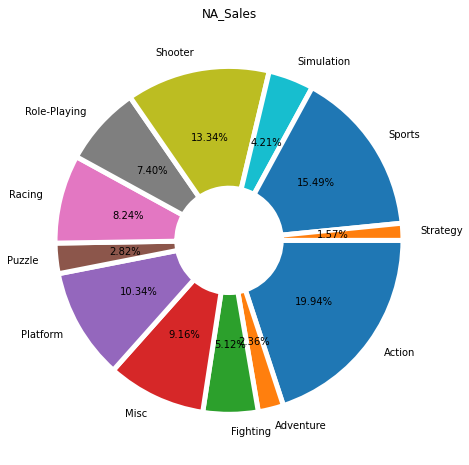

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
Local_NA = Local['NA_Sales']
ratio = Local_NA
labels = Local_NA.index
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title("NA_Sales")
plt.pie(ratio,labels=labels,autopct = '%.2f%%',counterclock=False, wedgeprops=wedgeprops)
plt.show()

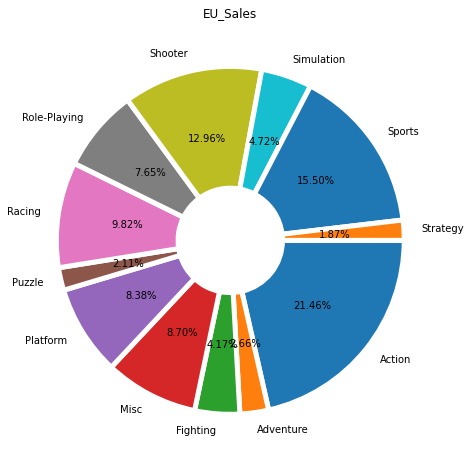

In [20]:
plt.figure(figsize=(8,8))
Local_EU = Local['EU_Sales']
ratio = Local_EU
labels = Local_EU.index
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title("EU_Sales")
plt.pie(ratio,labels=labels,autopct = '%.2f%%',counterclock=False, wedgeprops=wedgeprops)
plt.show()

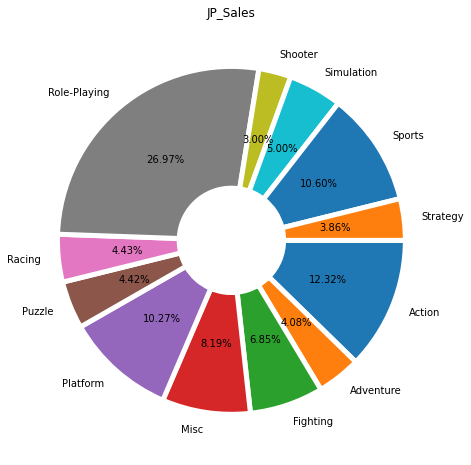

In [21]:
plt.figure(figsize=(8,8))
Local_JP = Local['JP_Sales']
ratio = Local_JP
labels = Local_JP.index
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title("JP_Sales")
plt.pie(ratio,labels=labels,autopct = '%.2f%%',counterclock=False, wedgeprops=wedgeprops)
plt.show()

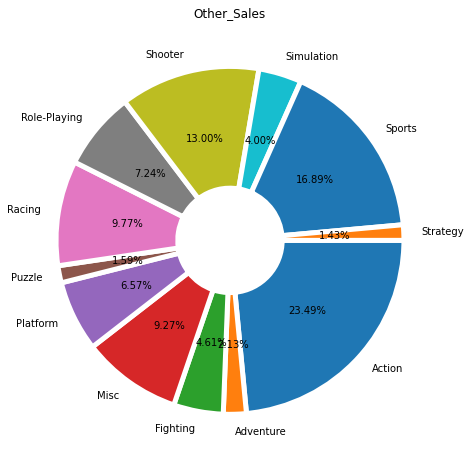

In [22]:
plt.figure(figsize=(8,8))
Local_OT = Local['Other_Sales']
ratio = Local_OT
labels = Local_OT.index
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title("Other_Sales")
plt.pie(ratio,labels=labels,autopct = '%.2f%%',counterclock=False, wedgeprops=wedgeprops)
plt.show()

In [23]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [48]:
country_sales = df.iloc[:,5:-1].sum()

In [49]:
country_sales

NA_Sales       4307.04
EU_Sales       2393.57
JP_Sales       1271.39
Other_Sales     783.37
dtype: float64

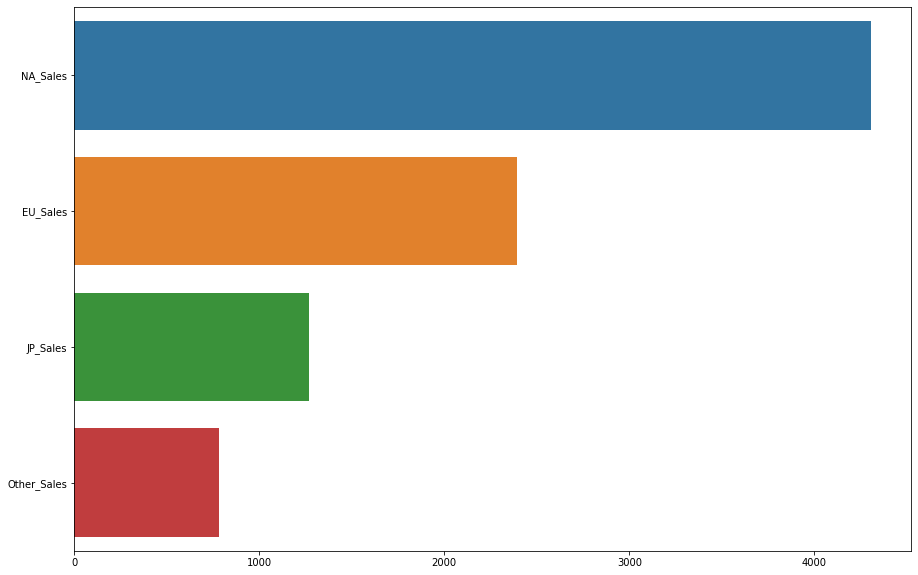

In [50]:
import seaborn as sns
fig = plt.figure(figsize=([15,10]))
sns.barplot(x=country_sales,y=country_sales.index,orient='h')
plt.show()

#### 연도별 게임의 트렌드가 있을까

In [27]:
df['All_sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [28]:
df2 = df[['Name','Year','Genre','All_sales']]

In [29]:
(df2.Year<2000).sum()

1968

In [30]:
(df2.Year>1999).sum()

14273

In [31]:
# 2000년대 이후의 데이터가 압도적으로 많으므로 2000년대 이후의 트렌드에 대해 확인 
df2 = df2[df2['Year']>1999]

In [32]:
(df2.Year<2000).sum()

0

In [33]:
df2.reset_index(drop=True)

,Name,Year,Genre,All_sales
0,Candace Kane's Candy Factory,2008,Action,0.04
1,The Munchables,2009,Action,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,2010,Adventure,0.02
3,Deal or No Deal: Special Edition,2010,Misc,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,2010,Platform,0.25
...,...,...,...,...
14268,Minna no Chizu 2,2007,Misc,0.02
14269,Ice Age 2: The Meltdown,2006,Platform,0.20
14270,Rainbow Islands: Revolution,2005,Action,0.01
14271,NBA 2K16,2015,Sports,0.79


In [34]:
#게임의 트렌드를 알아보기 위해 장르별 전체 판매량을 알아본다. 
Action = df2[df2.Genre == 'Action']
Adventure = df2[df2.Genre == 'Adventure']
Misc = df2[df2.Genre == 'Misc']
Platform = df2[df2.Genre == 'Platform']
Sports = df2[df2.Genre == 'Sports']
Simulation = df2[df2.Genre == 'Simulation']
Racing = df2[df2.Genre == 'Racing']
RolePlaying = df2[df2.Genre == 'Role-Playing']
Puzzle = df2[df2.Genre == 'Puzzle']
Strategy = df2[df2.Genre == 'Strategy']
Fighting = df2[df2.Genre == 'Fighting']
Shooter = df2[df2.Genre == 'Shooter']

In [35]:
# 연도로 장르 데이터를 묶어서 계산한다. 
Action = Action.groupby('Year').sum().reset_index()
Adventure = Adventure.groupby('Year').sum().reset_index()
Misc = Misc.groupby('Year').sum().reset_index()
Platform = Platform.groupby('Year').sum().reset_index()
Sports = Sports.groupby('Year').sum().reset_index()
Simulation = Simulation.groupby('Year').sum().reset_index()
Racing = Racing.groupby('Year').sum().reset_index()
RolePlaying = RolePlaying.groupby('Year').sum().reset_index()
Puzzle = Puzzle.groupby('Year').sum().reset_index()
Strategy = Strategy.groupby('Year').sum().reset_index()
Fighting = Fighting.groupby('Year').sum().reset_index()
Shooter = Shooter.groupby('Year').sum().reset_index()

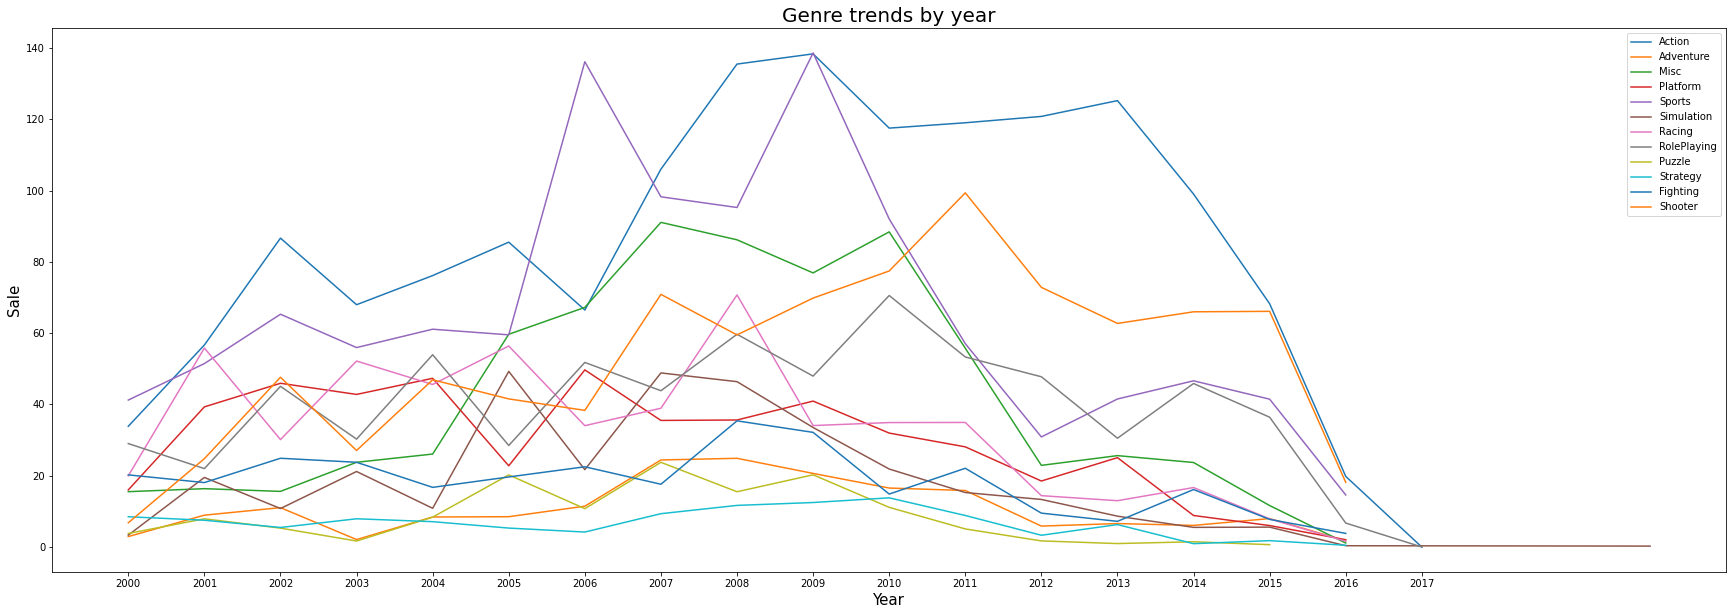

In [36]:
plt.figure(figsize=(30, 10))
plt.plot(Action.Year, Action.All_sales, label='Action')
plt.plot(Adventure.Year, Adventure.All_sales, label='Adventure')
plt.plot(Misc.Year, Misc.All_sales, label='Misc')
plt.plot(Platform.Year, Platform.All_sales, label='Platform')
plt.plot(Sports.Year, Sports.All_sales, label='Sports')
plt.plot(Simulation.Year, Simulation.All_sales, label='Simulation')
plt.plot(Racing.Year, Racing.All_sales, label='Racing')
plt.plot(RolePlaying.Year, RolePlaying.All_sales, label='RolePlaying')
plt.plot(Puzzle.Year, Puzzle.All_sales, label='Puzzle')
plt.plot(Strategy.Year, Strategy.All_sales, label='Strategy')
plt.plot(Fighting.Year, Fighting.All_sales, label='Fighting')
plt.plot(Shooter.Year, Shooter.All_sales, label='Shooter')

plt.xticks(Action.Year)
plt.title('Genre trends by year',fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Sale',fontsize=15)
plt.legend()
plt.show()

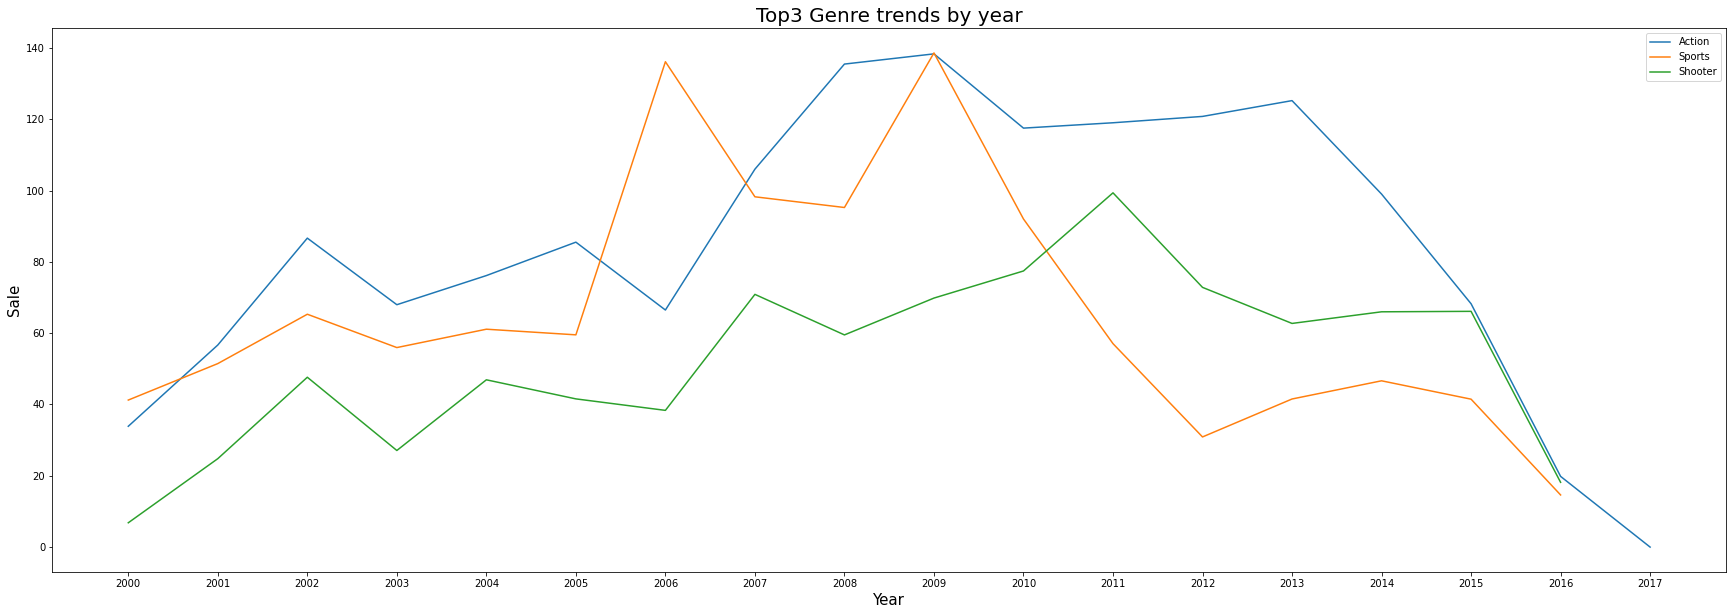

In [37]:
plt.figure(figsize=(30, 10))
plt.plot(Action.Year, Action.All_sales, label='Action')
plt.plot(Sports.Year, Sports.All_sales, label='Sports')
plt.plot(Shooter.Year, Shooter.All_sales, label='Shooter')

plt.xticks(Action.Year)
plt.title('Top3 Genre trends by year',fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Sale',fontsize=15)
plt.legend()
plt.show()

#### 인기가 많은 게임에 대한 분석 및 시각화 프로세스 

In [38]:
df_Platform = df[['Name','Platform','Genre','Year','All_sales']]
platform = df_Platform.groupby('Platform').count().sort_values(by='Name',ascending=False).reset_index()

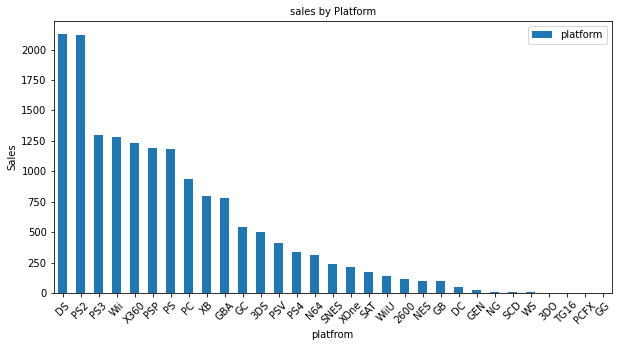

In [39]:
platform.plot.bar(x='Platform', y='Name',rot=45, figsize=(10,5), label='platform')
plt.xlabel('platfrom')
plt.ylabel('Sales')
plt.title('sales by Platform', fontsize=10)
plt.legend()
plt.show()

In [40]:
# 상위 네개 플랫폼 판매량량 확인
DS = df_Platform[df_Platform.Platform == 'DS']
DS = DS.groupby('Year').sum().reset_index()

PS2 = df_Platform[df_Platform.Platform == 'PS2']
PS2 = PS2.groupby('Year').sum().reset_index()

PS3 = df_Platform[df_Platform.Platform == 'PS3']
PS3 = PS3.groupby('Year').sum().reset_index()

Wii = df_Platform[df_Platform.Platform == 'Wii']
Wii = Wii.groupby('Year').sum().reset_index()


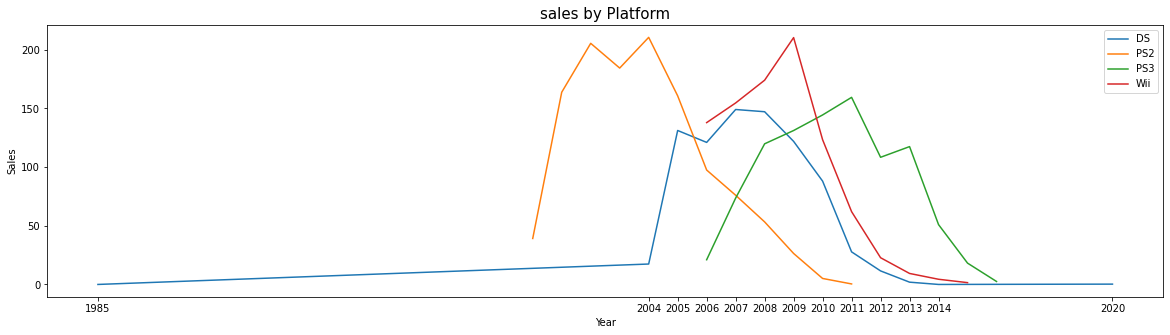

In [41]:
plt.figure(figsize=(20, 5))

plt.plot(DS.Year, DS.All_sales, label='DS')
plt.plot(PS2.Year, PS2.All_sales, label='PS2')
plt.plot(PS3.Year, PS3.All_sales, label='PS3')
plt.plot(Wii.Year, Wii.All_sales, label='Wii')
plt.xticks(DS.Year)
plt.title('sales by Platform',fontsize=15)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Sales',fontsize=10)
plt.legend()
plt.show()

In [42]:
df.loc[df['Name'] == 'FIFA Soccer 13','Genre'] = 'Sports'

In [43]:
df.loc[df['Name'] == 'FIFA Soccer 13']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_sales
4277,FIFA Soccer 13,PSV,2012,Sports,Electronic Arts,0.00,0.30,0.05,0.12,0.47
4403,FIFA Soccer 13,WiiU,2012,Sports,Electronic Arts,0.18,0.26,0.00,0.04,0.48
7624,FIFA Soccer 13,3DS,2012,Sports,Electronic Arts,0.06,0.20,0.00,0.03,0.29
9035,FIFA Soccer 13,PS3,2012,Sports,Electronic Arts,1.06,5.05,0.13,2.01,8.25
11321,FIFA Soccer 13,Wii,2012,Sports,Electronic Arts,0.19,0.46,0.00,0.08,0.73
12463,FIFA Soccer 13,X360,2012,Sports,Electronic Arts,1.08,3.48,0.03,0.58,5.17
15374,FIFA Soccer 13,PSP,2012,Sports,Electronic Arts,0.05,0.19,0.02,0.10,0.36
15472,FIFA Soccer 13,PC,2012,Sports,Electronic Arts,0.02,0.31,0.00,0.07,0.40


In [44]:
# 액션 장르이면서 Platform이 PS3인 것 
str = "(Platform =='PS3') and (Genre == 'Action')"
Like = df.query(str)
Like = Like.sort_values(by = 'All_sales',ascending = False)

In [45]:
Like = Like.iloc[:5]
Like

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_sales
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
16475,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.58
11868,Uncharted 3: Drake's Deception,PS3,2011,Action,Sony Computer Entertainment,2.77,2.80,0.19,1.06,6.82
13552,Uncharted 2: Among Thieves,PS3,2009,Action,Sony Computer Entertainment,3.27,2.25,0.21,1.00,6.73
16276,Red Dead Redemption,PS3,2010,Action,Take-Two Interactive,2.79,2.61,0.17,1.03,6.60


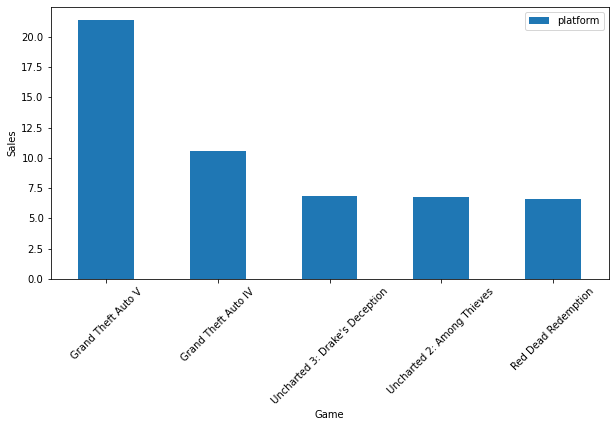

In [46]:
Like.plot.bar(x='Name', y='All_sales',rot=45, figsize=(10,5), label='platform')

plt.xlabel('Game')
plt.ylabel('Sales')
plt.legend()
plt.show()

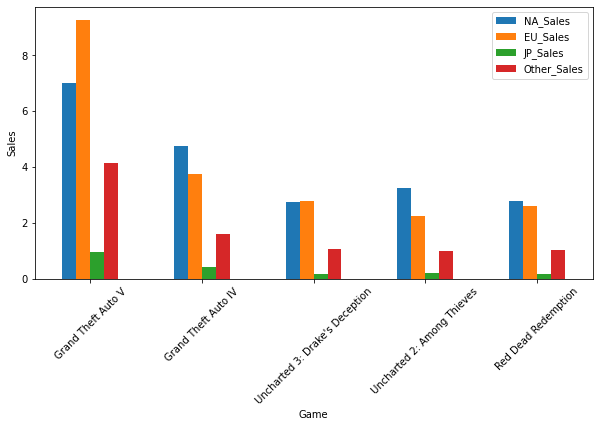

In [47]:
Like.plot.bar(x='Name', y=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],rot=45, figsize=(10,5))
plt.xlabel('Game')
plt.ylabel('Sales')
plt.legend()
# 아마 일본 시장에서는 RPG의 영향이 더 크기 때문에